<a href="https://colab.research.google.com/github/taareek/neural_netwok/blob/main/NN_Assignment_5a_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Enabling GPU*

In [46]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


*Importing necessary libraries*

In [47]:
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*Downloading CIFAR-10 dataset*

In [48]:
batch_size = 40
transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize( 
       (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010) 
    )])
train_dataset = torchvision.datasets.CIFAR10(root= './data', train = True, download =True, transform = transform)
test_dataset = torchvision.datasets.CIFAR10(root= './data', train = False, download =True, transform = transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle = True)
total_step = len(train_loader)
print(total_step)

Files already downloaded and verified
Files already downloaded and verified
1250


In [49]:
print('Training set samples:', len(train_dataset))
print('Test set samples:', len(test_dataset))

Training set samples: 50000
Test set samples: 10000


In [50]:
# image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

*Visualize Dataset*

In [51]:
%matplotlib inline

# helper function to display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

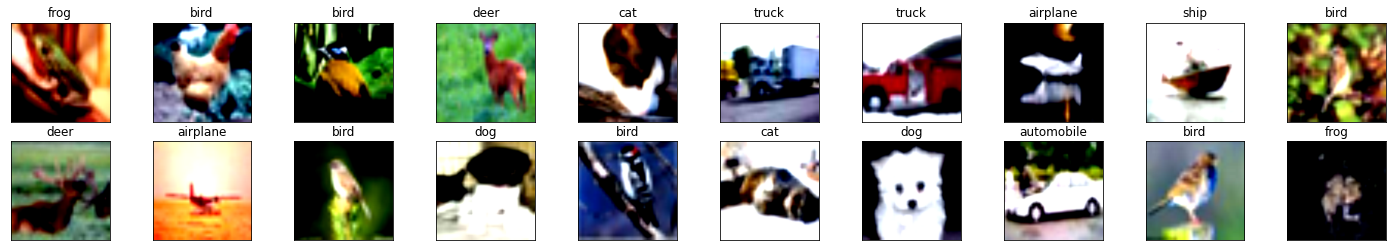

In [52]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # Converted Image to numpy

# plot the images in the batch, along with the corresponding labels

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

**Loading VGG 16 Network**

In [53]:
vgg16 = models.vgg16(pretrained=True)
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

*Optimizer and loss function*

In [54]:
# optimizer
optimizer = optim.SGD(vgg16.classifier.parameters(), lr=0.001, momentum=0.9, weight_decay= 5e-4)
# loss function
criterion = nn.CrossEntropyLoss()

**2 Layer VGG 16 Network**

In [55]:
class VGG16(nn.Module):
    def __init__(self, pretrained= True, numClasses= 10):
        super(VGG16, self).__init__()
        # conv1 
        self.conv1_1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.relu1_1 = nn.ReLU(inplace=True)
        self.conv1_2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.relu1_2 = nn.ReLU(inplace=True)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        #conv2
        self.conv2_1 = nn.Conv2d(64, 128, kernel_size= 3, padding= 1)
        self.relu2_1 = nn.ReLU(inplace= True)
        self.conv2_2 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.relu2_2 = nn.ReLU(inplace=True)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # load pretrained params from torchvision.models.vgg16(pretrained=True)
        # From the original models.vgg16 (preconditioned = true).
        if pretrained:
            pretrained_model = torchvision.models.vgg16(pretrained=pretrained)  # Loading VGG16 network parameters from pre training model
            pretrained_params = pretrained_model.state_dict()
            keys = list(pretrained_params.keys())
            new_dict = {}
            for index, key in enumerate(self.state_dict().keys()):
                new_dict[key] = pretrained_params[keys[index]]
            self.load_state_dict(new_dict)

        self.classifier = nn.Sequential( 
            #nn.Linear(in_features=512 * 7 * 7, out_features=256),  # Default
            nn.Linear(in_features=8192 * 7 * 7, out_features=256),  # As we have taken 2 layers
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(in_features=256, out_features=256),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(in_features=256, out_features=numClasses),
        )
        
    def forward(self, x):   # output: 224 * 224 * 3
        x = self.relu1_1(self.conv1_1(x))  # output: 224 * 224 * 64
        x = self.relu1_2(self.conv1_2(x))  # output: 224 * 224 * 64
        x = self.pool1(x)  # output: 112 * 112 * 128

        x = self.relu2_1(self.conv2_1(x))
        x = self.relu2_2(self.conv2_2(x))
        x = self.pool2(x)
        #flattening
        x = x.view(x.size(0), -1)
        output = self.classifier(x)
        return output

*Training our VGG-16 Model*

In [56]:
# Taking CNN as we created above
model = VGG16()
print(model)

VGG16(
  (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1_1): ReLU(inplace=True)
  (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1_2): ReLU(inplace=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2_1): ReLU(inplace=True)
  (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2_2): ReLU(inplace=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (classifier): Sequential(
    (0): Linear(in_features=401408, out_features=256, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=256, out_features=10, bias=True)
  )
)


In [60]:
def vgg_16():
  epochs = 5 
  model = VGG16()
  if torch.cuda.is_available():
    model.cuda()

  for epoch in range(epochs):
    for i, (imgs, labels) in enumerate(train_loader):
      imgs = imgs.to(device)
      labels = labels.to(device)
      optimizer.zero_grad()
      output = model(imgs)
      n_corrects = (output.argmax(axis= 1) == labels).sum().item()
      loss_value = criterion(output, labels)
      loss_value.backward()
      optimizer.step()
      #optimizer.zero_grad()
      if (i+1) % 250 == 0:
        print(f'epoch {epoch+1}/{epochs}, step: {i+1}/{total_step}: loss = {loss_value:.5f}, acc = {100*(n_corrects/labels.size(0)):.2f}%')
    print()

In [61]:
# Calling vgg_16 function to train our created model 
#model = VGG16
#vgg_16()
print("Training starts...\n", vgg_16())

epoch 1/5, step: 250/1250: loss = 2.41710, acc = 7.50%
epoch 1/5, step: 500/1250: loss = 2.43823, acc = 5.00%
epoch 1/5, step: 750/1250: loss = 2.27222, acc = 2.50%
epoch 1/5, step: 1000/1250: loss = 2.36709, acc = 7.50%
epoch 1/5, step: 1250/1250: loss = 2.33055, acc = 15.00%

epoch 2/5, step: 250/1250: loss = 2.41575, acc = 5.00%
epoch 2/5, step: 500/1250: loss = 2.35807, acc = 20.00%
epoch 2/5, step: 750/1250: loss = 2.33104, acc = 7.50%
epoch 2/5, step: 1000/1250: loss = 2.32422, acc = 12.50%
epoch 2/5, step: 1250/1250: loss = 2.36473, acc = 10.00%

epoch 3/5, step: 250/1250: loss = 2.40232, acc = 5.00%
epoch 3/5, step: 500/1250: loss = 2.30407, acc = 5.00%
epoch 3/5, step: 750/1250: loss = 2.45528, acc = 10.00%
epoch 3/5, step: 1000/1250: loss = 2.40107, acc = 10.00%
epoch 3/5, step: 1250/1250: loss = 2.43912, acc = 10.00%

epoch 4/5, step: 250/1250: loss = 2.33223, acc = 7.50%
epoch 4/5, step: 500/1250: loss = 2.36134, acc = 5.00%
epoch 4/5, step: 750/1250: loss = 2.40017, acc = 

**Accuracy**

In [62]:
def total_accuracy():
  model = VGG16()
  if torch.cuda.is_available():
    model.cuda()

  with torch.no_grad():
    number_samples = 0
    number_corrects = 0
    for i, (test_images_set, test_labels_set) in enumerate(test_loader):
      test_images_set = test_images_set.to(device)
      test_labels_set = test_labels_set.to(device)

      y_predicted = model(test_images_set)
      labels_predicted = y_predicted.argmax(axis = 1)        
      number_corrects += (labels_predicted==test_labels_set).sum().item()
      number_samples += test_labels_set.size(0)    
    print(f'Overall accuracy {(number_corrects / number_samples)*100}%')


In [63]:
# Overall accuracy
total_accuracy()

Overall accuracy 9.81%


In [64]:
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, 
    num_workers=num_workers)

In [68]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    #if train_on_gpu:
     #   data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 2.319446

Test Accuracy of airplane: 74% (742/1000)
Test Accuracy of automobile:  1% (11/1000)
Test Accuracy of  bird:  0% ( 1/1000)
Test Accuracy of   cat:  5% (59/1000)
Test Accuracy of  deer:  1% (15/1000)
Test Accuracy of   dog: 10% (109/1000)
Test Accuracy of  frog:  0% ( 1/1000)
Test Accuracy of horse:  0% ( 0/1000)
Test Accuracy of  ship:  6% (68/1000)
Test Accuracy of truck:  5% (51/1000)

Test Accuracy (Overall): 10% (1057/10000)


**Confusion Matrix**

In [69]:
# Function to plot confusion matrix

from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [74]:
# Function for prediction
# It works!
@torch.no_grad()
def prediction(cnn, batch_loader):
  total_preds = torch.tensor([]).cuda()
  for data, target in test_loader:
    # move tensors to GPU if CUDA is available
   # if train_on_gpu:
    #    data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # convert output probabilities to predicted class
    _,pred = torch.max(output, 1) 
    total_preds = torch.cat(
            (total_preds, output.to(device))
            ,dim=0
        )
  return total_preds

In [75]:
#test_prediction_loader = torch.utils.data.DataLoader(test_data, batch_size=20)
with torch.no_grad():
    test_prediction_loader = torch.utils.data.DataLoader(test_dataset, batch_size=20)
    test_preds = prediction(model, test_prediction_loader)

In [76]:
len(test_preds)

10000

In [77]:
test_preds = test_preds.cpu()
conf_matrix = confusion_matrix(test_data.targets, test_preds.argmax(dim= 1))
print(conf_matrix)

[[742   3   3  24  12  96   0   1  71  48]
 [620  11   2  41  25 120   0   0 138  43]
 [711   6   1  49  26  94   0   1  66  46]
 [652   8   1  59  29 101   0   0  89  61]
 [726   3   1  45  15  93   2   0  64  51]
 [654   2   0  61  25 109   1   0  99  49]
 [642   7   3  60  31 100   1   0 100  56]
 [679   7   4  50  19  91   0   0  92  58]
 [782   5   1  13  11  88   0   0  68  32]
 [631   8   3  62  22 111   2   0 110  51]]


Confusion matrix, without normalization


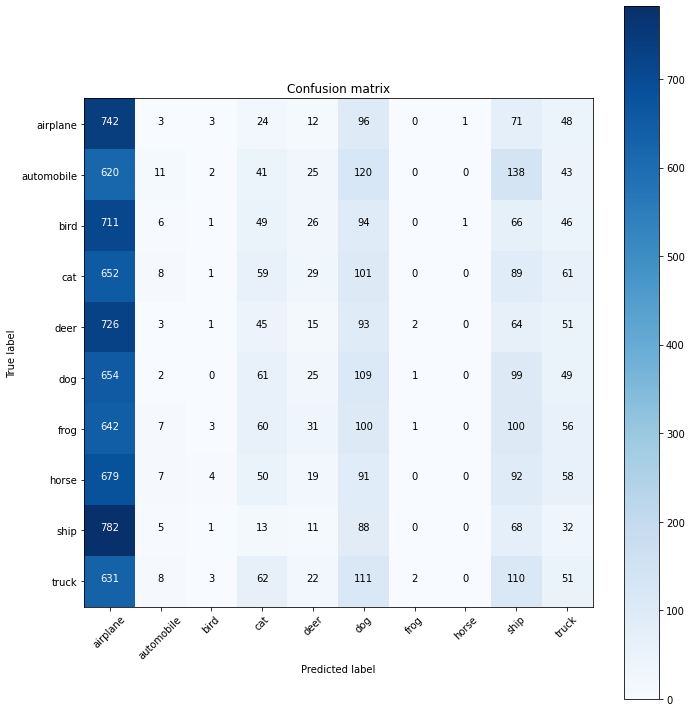

In [78]:
plt.figure(figsize=(10,10))
plot_confusion_matrix(conf_matrix, train_data.classes)

**Visualize Test set Images**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

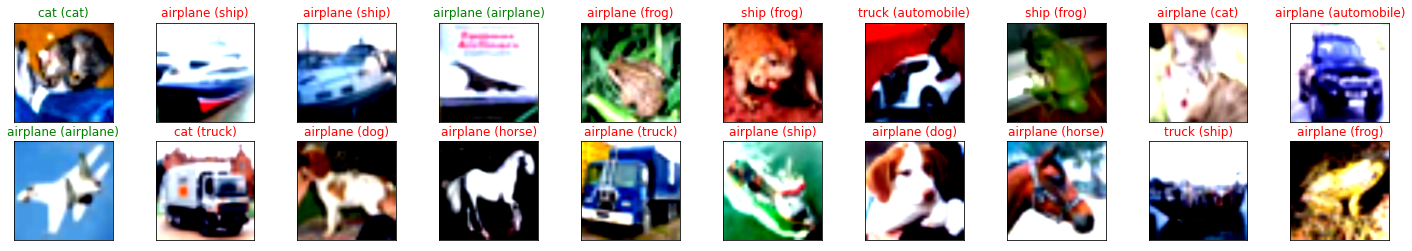

In [80]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
#if train_on_gpu:
 #   images = images.cuda()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx] if not train_on_gpu else images[idx].cpu())
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))

Save the model we trained

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [83]:
model = VGG16()
torch.save(model, '/content/drive/MyDrive/Colab Notebooks/VGG16.pth')